In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df_0 = pd.read_csv('splits/lag_0/dataset.csv')
df_0.drop(labels='Unnamed: 0', axis=1, inplace=True)

<Figure size 1000x500 with 0 Axes>

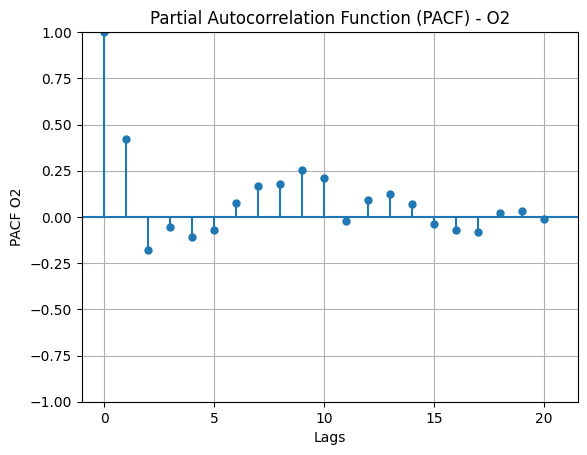

<Figure size 1000x500 with 0 Axes>

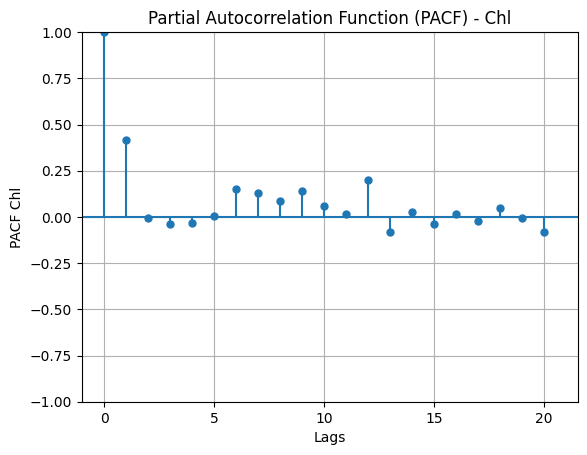

<Figure size 1000x500 with 0 Axes>

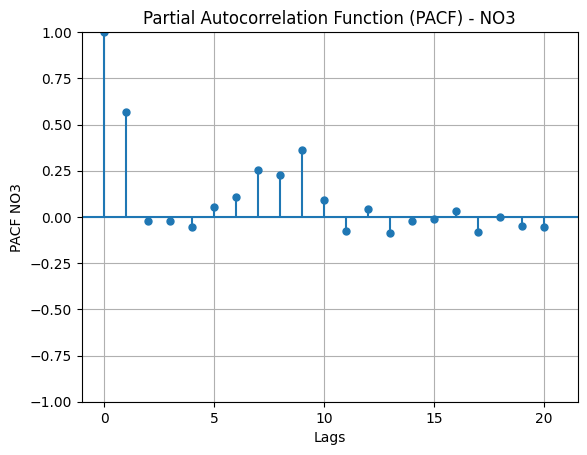

<Figure size 1000x500 with 0 Axes>

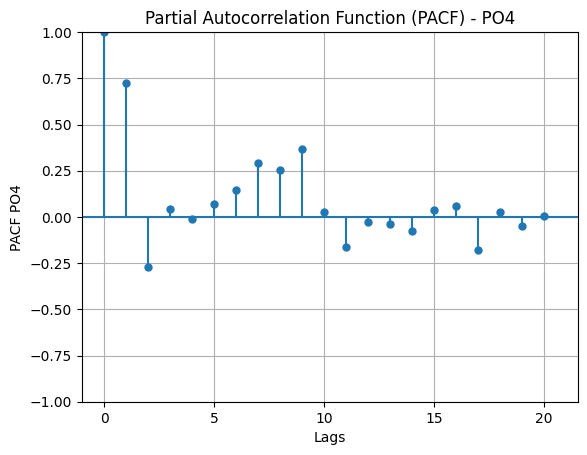

<Figure size 1000x500 with 0 Axes>

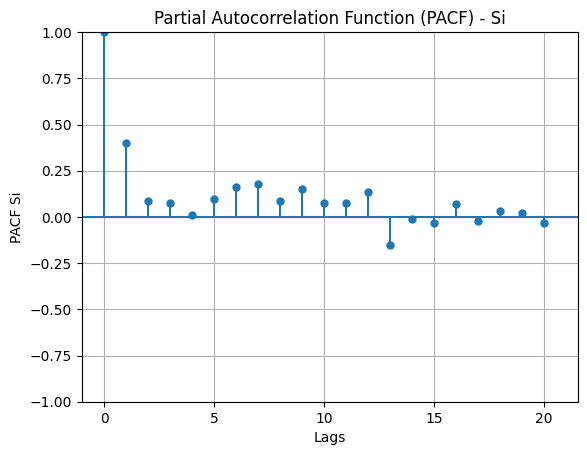

<Figure size 1000x500 with 0 Axes>

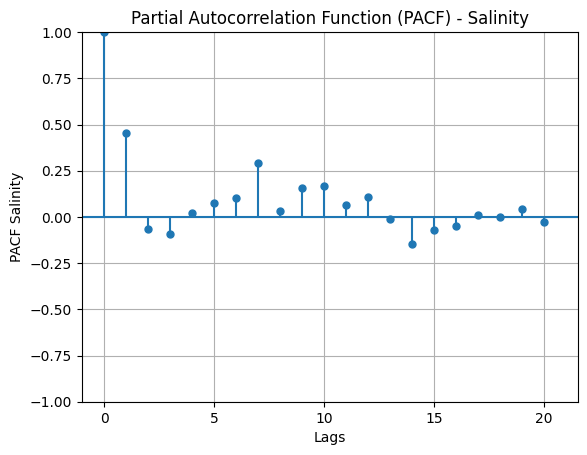

<Figure size 1000x500 with 0 Axes>

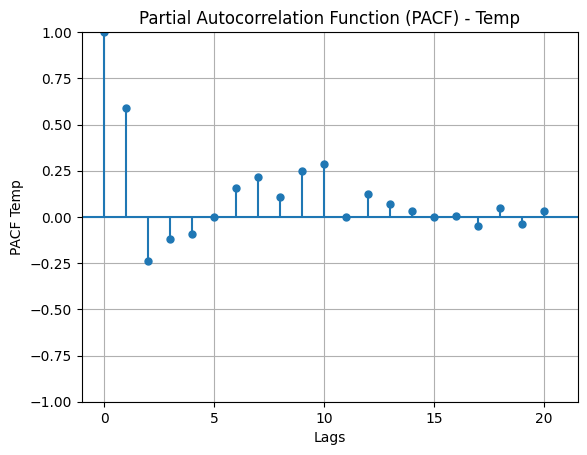

In [3]:
pacf_values_o2 = pacf(df_0['o2'], nlags=20)
pacf_values_chl = pacf(df_0['chl'], nlags=20)
pacf_values_no3 = pacf(df_0['no3'], nlags=20)
pacf_values_po4 = pacf(df_0['po4'], nlags=20)
pacf_values_si = pacf(df_0['si'], nlags=20)
pacf_values_salinity = pacf(df_0['salinity'], nlags=20)
pacf_values_temp = pacf(df_0['temp'], nlags=20)
 

# Plot PACF O2
plt.figure(figsize=(10, 5))
plot_pacf(df_0['o2'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - O2')
plt.xlabel('Lags')
plt.ylabel('PACF O2')
plt.grid(True)
plt.show()


# Plot PACF Chl
plt.figure(figsize=(10, 5))
plot_pacf(df_0['chl'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - Chl')
plt.xlabel('Lags')
plt.ylabel('PACF Chl')
plt.grid(True)
plt.show()


# Plot PACF NO3
plt.figure(figsize=(10, 5))
plot_pacf(df_0['no3'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - NO3')
plt.xlabel('Lags')
plt.ylabel('PACF NO3')
plt.grid(True)
plt.show()

# Plot PACF PO4
plt.figure(figsize=(10, 5))
plot_pacf(df_0['po4'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - PO4')
plt.xlabel('Lags')
plt.ylabel('PACF PO4')
plt.grid(True)
plt.show()

# Plot PACF Si
plt.figure(figsize=(10, 5))
plot_pacf(df_0['si'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - Si')
plt.xlabel('Lags')
plt.ylabel('PACF Si')
plt.grid(True)
plt.show()

# Plot PACF Salinity
plt.figure(figsize=(10, 5))
plot_pacf(df_0['salinity'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - Salinity')
plt.xlabel('Lags')
plt.ylabel('PACF Salinity')
plt.grid(True)
plt.show()

# Plot PACF Temp
plt.figure(figsize=(10, 5))
plot_pacf(df_0['temp'], lags=20)  
plt.title('Partial Autocorrelation Function (PACF) - Temp')
plt.xlabel('Lags')
plt.ylabel('PACF Temp')
plt.grid(True)
plt.show()

In [4]:
store_error = []
num_lead = 10
for lag in range(21):
    num_lag = lag
    X_train = pd.read_csv('splits/lag_{}/X_train.csv'.format(num_lag))
    X_valid = pd.read_csv('splits/lag_{}/X_valid.csv'.format(num_lag))
    X_test = pd.read_csv('splits/lag_{}/X_test.csv'.format(num_lag))
    y_train = pd.read_csv('splits/lag_{}/Y_train.csv'.format(num_lag))
    y_valid = pd.read_csv('splits/lag_{}/Y_valid.csv'.format(num_lag))
    y_test = pd.read_csv('splits/lag_{}/Y_test.csv'.format(num_lag))
    for df in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
      df.drop(labels='Unnamed: 0', axis=1, inplace=True)

    # Fit and predict
    model = LinearRegression()  
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid) 
    store_error.append(np.sqrt(mean_squared_error(y_valid, y_pred_valid)))

    # model evaluation 
    print( 
      'Mean squared error with lag {}: '.format(num_lag), np.sqrt(mean_squared_error(y_valid, y_pred_valid)))
    for i in range(num_lead):
        err = np.sqrt(mean_squared_error(
            y_pred_valid[:, 6 + 7 * i], y_valid.iloc[:, 6 + 7 * i]))
        print(f'Day: {i+1}')
        print(f'Average oxygen prediction error: {err}')
    print('------------------------------------------------')


Mean squared error with lag 0:  0.09180306344705906
Day: 1
Average oxygen prediction error: 0.03284400077728336
Day: 2
Average oxygen prediction error: 0.0583374287817822
Day: 3
Average oxygen prediction error: 0.07618174474510771
Day: 4
Average oxygen prediction error: 0.09011325056929562
Day: 5
Average oxygen prediction error: 0.10254503043911564
Day: 6
Average oxygen prediction error: 0.11408049323489503
Day: 7
Average oxygen prediction error: 0.12473888695482761
Day: 8
Average oxygen prediction error: 0.13455021196621356
Day: 9
Average oxygen prediction error: 0.14396592772968864
Day: 10
Average oxygen prediction error: 0.1527635236969773
------------------------------------------------
Mean squared error with lag 1:  0.08721170051958388
Day: 1
Average oxygen prediction error: 0.026165766954269937
Day: 2
Average oxygen prediction error: 0.05367554323535843
Day: 3
Average oxygen prediction error: 0.07164978839030098
Day: 4
Average oxygen prediction error: 0.08469919102907862
Day: 5


Mean squared error with lag 12:  0.08481117498446882
Day: 1
Average oxygen prediction error: 0.019992323119061198
Day: 2
Average oxygen prediction error: 0.049854731851572416
Day: 3
Average oxygen prediction error: 0.06988319643925099
Day: 4
Average oxygen prediction error: 0.08325409303603155
Day: 5
Average oxygen prediction error: 0.09516830712827545
Day: 6
Average oxygen prediction error: 0.10596424793048152
Day: 7
Average oxygen prediction error: 0.11615683189473895
Day: 8
Average oxygen prediction error: 0.12540292314786727
Day: 9
Average oxygen prediction error: 0.13324333538535857
Day: 10
Average oxygen prediction error: 0.1406280543088425
------------------------------------------------
Mean squared error with lag 13:  0.08475499455196402
Day: 1
Average oxygen prediction error: 0.020013164110564485
Day: 2
Average oxygen prediction error: 0.04987518560417981
Day: 3
Average oxygen prediction error: 0.06989623083718212
Day: 4
Average oxygen prediction error: 0.08327218971119293
Da

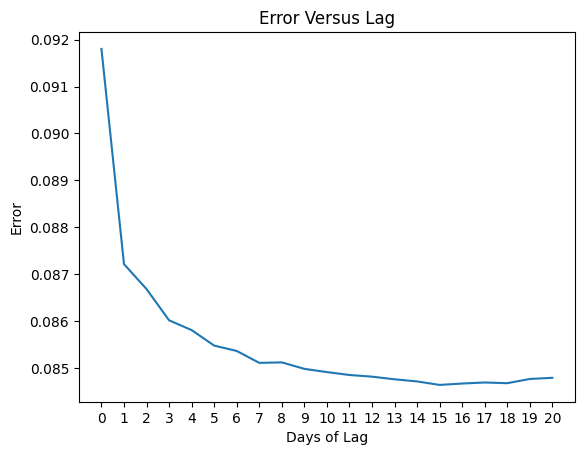

In [5]:
plt.plot(range(21), store_error)
plt.title('Error Versus Lag')
plt.xticks(range(21))
plt.xlabel('Days of Lag')
plt.ylabel('Error')
plt.show()